# <font color='blue'>Data Science Academy</font>
# <font color='blue'>Análise de Dados com Linguagem Python</font>

## <font color='blue'>Projeto 4</font>
## <font color='blue'>Análise de Dados Para Campanhas de Marketing de Instituições Financeiras</font>

![title](imagens/Projeto4.png)

## Instalando e Carregando os Pacotes

In [11]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys, os 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [12]:
# Adicionando caminhos para os modulos
sys.path.append(os.path.abspath(os.path.join('modulos')))
from estrategia1 import *
from estrategia2 import *
from estrategia3 import *

## Carregando os Dados

In [13]:
# Carrega o dataset
df = pd.read_csv("dados/dataset.csv")

In [14]:
# Shape
df.shape

(45211, 19)

In [15]:
# Amostra
df.head()

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000.0,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000.0,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000.0,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000.0,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0.0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


## Análise Exploratória

In [16]:
# Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   customerid  45211 non-null  int64  
 1   age         45191 non-null  float64
 2   salary      45185 non-null  float64
 3   balance     45211 non-null  int64  
 4   marital     45211 non-null  object 
 5   jobedu      45211 non-null  object 
 6   targeted    45211 non-null  object 
 7   default     45211 non-null  object 
 8   housing     45211 non-null  object 
 9   loan        45211 non-null  object 
 10  contact     45211 non-null  object 
 11  day         45211 non-null  int64  
 12  month       45161 non-null  object 
 13  duration    45211 non-null  object 
 14  campaign    45211 non-null  int64  
 15  pdays       45211 non-null  int64  
 16  previous    45211 non-null  int64  
 17  poutcome    45211 non-null  object 
 18  response    45181 non-null  object 
dtypes: float64(2), int64(6), 

In [17]:
# Temos valores nulos? Sim ou Nao?
df.isna().any()

customerid    False
age            True
salary         True
balance       False
marital       False
jobedu        False
targeted      False
default       False
housing       False
loan          False
contact       False
day           False
month          True
duration      False
campaign      False
pdays         False
previous      False
poutcome      False
response       True
dtype: bool

In [18]:
# Temos valores nulos? Quantos?
df.isna().sum()

customerid     0
age           20
salary        26
balance        0
marital        0
jobedu         0
targeted       0
default        0
housing        0
loan           0
contact        0
day            0
month         50
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
response      30
dtype: int64

In [19]:
# Nao usaremos a coluna ID. Vamos remove-la
df.drop(['customerid'], axis = 1, inplace= True)

In [20]:
# Colunas
df.columns

Index(['age', 'salary', 'balance', 'marital', 'jobedu', 'targeted', 'default',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'response'],
      dtype='object')

> Exercício 1: A coluna "jobedu" parece ter duas informações. Vamos separar em duas colunas.

In [21]:
# Fazemos o split da coluna jobedu e criamos a coluna job com o primeiro elemento antes da virgula
#df[['job', 'education']] = df['jobedu'].str.split(',', n= 1, expand= True) outra forma de separar
df['job'] = df['jobedu'].apply(lambda x:x.split(",")[0])

In [22]:
df.head()

,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job
0,58.0,100000.0,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management
1,44.0,60000.0,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician
2,33.0,120000.0,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur
3,47.0,20000.0,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar
4,33.0,0.0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown


In [23]:
# Fazemos o split da coluna jobedu e criamos a coluna job com o segundo elemento antes da virgula
df['education'] = df['jobedu'].apply(lambda x:x.split(",")[1])

In [24]:
df.head()

,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000.0,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000.0,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33.0,120000.0,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47.0,20000.0,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33.0,0.0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown


In [25]:
# Drop de coluna "jobedu"
df.drop(["jobedu"], axis = 1, inplace= True)

In [26]:
df.head()

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000.0,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000.0,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33.0,120000.0,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47.0,20000.0,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33.0,0.0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown


## Tratamento de Valores Ausentes

> Vamos primeiro tratar a variável que representa a idade.

In [27]:
# Valores ausentes no dataframe
df.isna().any()

age           True
salary        True
balance      False
marital      False
targeted     False
default      False
housing      False
loan         False
contact      False
day          False
month         True
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
response      True
job          False
education    False
dtype: bool

In [28]:
# Valores ausentes da variável age
df.age.isnull().sum()

np.int64(20)

In [29]:
# Calcula o percentual de valores ausentes na variável age
df.age.isnull().mean()*100

np.float64(0.0442370219636814)

Como o percentual é baixo não podemos eliminar a coluna. Podemos então eliminar os registros com valores ausentes (nesse caso perderíamos 20 linhas no dataset) ou podemos aplicar imputação. Vamos usar a segunda opção.

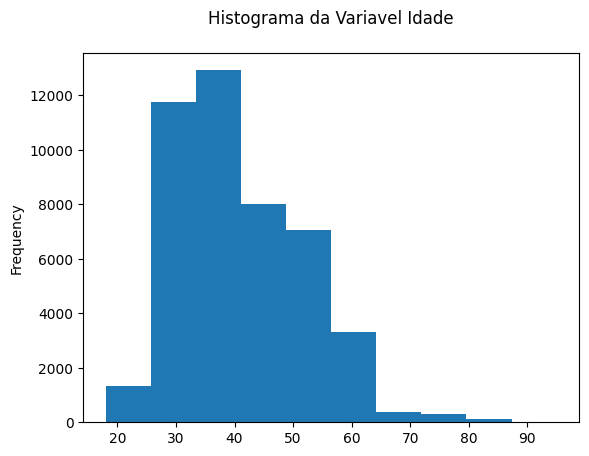

In [30]:
# Histograma
df.age.plot(kind = "hist")
plt.title("Histograma da Variavel Idade\n")
plt.show()

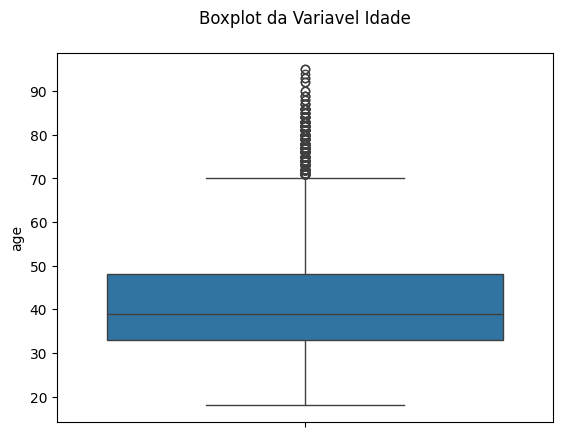

In [31]:
# Boxplot
sns.boxplot(df.age)
plt.title("Boxplot da Variavel Idade\n")
plt.show()

In [32]:
# Vamos verificar qual é a média de idade.
df.age.mean()

np.float64(40.93565090394105)

In [33]:
# Vamos verificar qual é a mediana, valor do meio da distribuição quando os dados estão ordenados.
df.age.median()

np.float64(39.0)

In [34]:
# Vamos verificar qual é a moda, o valor que aparece com mais frequência.
df.age.mode()

0    32.0
Name: age, dtype: float64

> Exercício 2: Vamos imputar os valores ausentes da variável age com uma medida de tendência central. Escolha uma das medidas, aplique a imputação e justifique sua escolha. Deixamos a variável como float ou como int? Se convertemos, fazemos isso antes ou depois da imputação?

In [35]:
# Imputando valores seguindo o metodo moda pois sao poucos valores ausentes e assim alteramos muito pouco o padrao nos dados
df.age.fillna("32", inplace= True) #32 e o valor da moda, e inplace e para salvar no proprio dataframe

In [36]:
# Convertendo para INT
df.age = df.age.astype("int")

In [37]:
# Calculando novamente o percentual de valores ausentes
df.age.isnull().mean()*100

np.float64(0.0)

> Vamos agora tratar a variável que representa o mês.

In [38]:
# Valores ausentes na variável
df.month.isnull().sum()

np.int64(50)

In [39]:
# Percentual de valores ausentes
df.month.isnull().mean()*100

np.float64(0.11059255490920351)

Como o percentual é menor que 30% não podemos eliminar a coluna. Podemos então eliminar os registros com valores ausentes (nesse caso perderíamos 50 linhas no dataset) ou podemos aplicar imputação. Vamos usar a segunda opção.

In [40]:
# Tipo da variavel
df.month.dtypes

dtype('O')

In [41]:
# Categorias da variavel
df.month.value_counts()

month
may, 2017    13747
jul, 2017     6888
aug, 2017     6240
jun, 2017     5335
nov, 2017     3968
apr, 2017     2931
feb, 2017     2646
jan, 2017     1402
oct, 2017      738
sep, 2017      576
mar, 2017      476
dec, 2017      214
Name: count, dtype: int64

> Exercício 3: Vamos imputar os valores ausentes da variável month. Escolha uma estratégia e aplique no dataset.

In [42]:
# Vamos imputar com a moda, o valor mais frequente da variavel, pois sao poucos registros
df.month.mode()

0    may, 2017
Name: month, dtype: object

In [43]:
# Imputacao com a moda
df.month.fillna("may, 2017", inplace= True)

In [44]:
# Valores ausentes tratados com sucesso
df.month.isnull().sum()

np.int64(0)

> Vamos agora tratar a variável que representa o salário.

In [45]:
# Valores ausentes na variavel
df.salary.isnull().sum()

np.int64(26)

In [46]:
# Calcula o percentual de valores ausentes na variavel salary
df.salary.isnull().mean()*100

np.float64(0.05750812855278583)

Como o percentual é baixo não podemos eliminar a coluna. Podemos então eliminar os registros com valores ausentes (nesse caso perderíamos 26 linhas no dataset) ou podemos aplicar imputação. Vamos usar a segunda opção.

Mas espere. Vamos checar algo aqui.

In [47]:
print(df)

       age    salary  balance   marital targeted default housing loan  \
0       58  100000.0     2143   married      yes      no     yes   no   
1       44   60000.0       29    single      yes      no     yes   no   
2       33  120000.0        2   married      yes      no     yes  yes   
3       47   20000.0     1506   married       no      no     yes   no   
4       33       0.0        1    single       no      no      no   no   
...    ...       ...      ...       ...      ...     ...     ...  ...   
45206   51   60000.0      825   married      yes      no      no   no   
45207   71   55000.0     1729  divorced      yes      no      no   no   
45208   72   55000.0     5715   married      yes      no      no   no   
45209   57   20000.0      668   married      yes      no      no   no   
45210   37  120000.0     2971   married      yes      no      no   no   

         contact  day      month              duration  campaign  pdays  \
0        unknown    5  may, 2017               2

Existe salário igual a zero? Não. O valor zero é provavelmente um valor ausente (confirmar com a área de negócio).

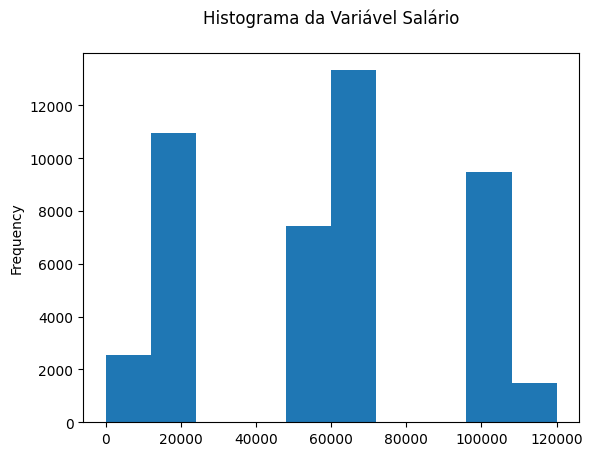

In [48]:
# Histograma
df.salary.plot(kind = "hist")
plt.title("Histograma da Variável Salário\n")
plt.show()

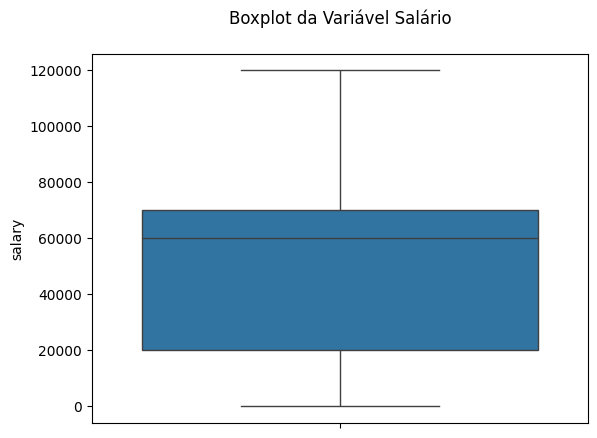

In [49]:
# Boxplot
sns.boxplot(df.salary)
plt.title("Boxplot da Variável Salário\n")
plt.show()

In [50]:
# Vamos verificar qual é a média 
df.salary.mean()

np.float64(57008.65331415293)

In [51]:
# Vamos verificar qual a mediana
df.salary.median()

np.float64(60000.0)

In [52]:
# Vamos verificar qual a moda
df.salary.mode()

0    20000.0
Name: salary, dtype: float64

> Exercício 4: Vamos imputar os valores ausentes da variável salary com uma medida de tendência central. Precisamos também tratar os valores iguais a zero. Escolha sua estratégia, aplique a imputação e justifique sua escolha. 

In [53]:
# Vamos preencher com a mediana pois os dados parecem assimetricos (nesse caso a media nao pode ser usada)
# e o valor mais frequente esta muito abaixo da media e da mediana (por isso nao usaremos a moda)
df.salary.fillna("6000", inplace= True)

In [54]:
df.head()

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58,100000.0,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44,60000.0,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33,120000.0,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47,20000.0,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33,0.0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown


In [55]:
# Convertemos para o tipo float
df.salary = df.salary.astype("float")

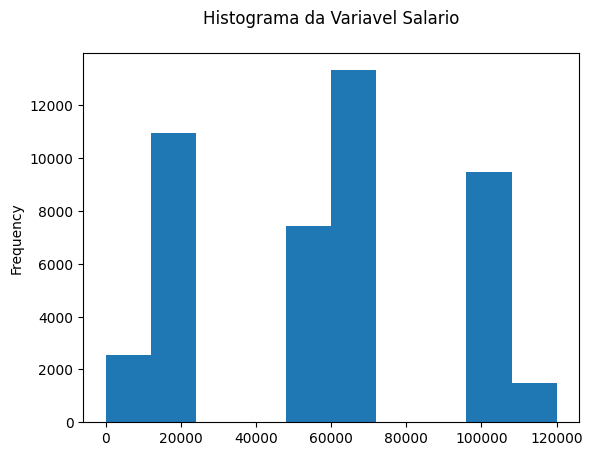

In [56]:
# Histograma
df.salary.plot(kind= "hist")
plt.title("Histograma da Variavel Salario\n")
plt.show()

In [57]:
# Registro para cada salario
df.salary.value_counts()

salary
20000.0     9725
100000.0    9454
60000.0     9169
50000.0     5167
70000.0     4153
55000.0     2264
120000.0    1486
8000.0      1303
16000.0     1239
4000.0       937
0.0          288
6000.0        26
Name: count, dtype: int64

In [58]:
# Replace do zero pela mediana
df['salary'] = df['salary'].replace(0, df['salary'].median())

In [59]:
# Registros para cada salario
df.salary.value_counts()

salary
20000.0     9725
60000.0     9457
100000.0    9454
50000.0     5167
70000.0     4153
55000.0     2264
120000.0    1486
8000.0      1303
16000.0     1239
4000.0       937
6000.0        26
Name: count, dtype: int64

In [60]:
# Calcula o percentual de valores ausentes na variavel salary
df.salary.isnull().mean()*100

np.float64(0.0)

> Vamos agora tratar a variável que representa a resposta (variável alvo).

In [61]:
# Valores ausentes
df.response.isnull().sum()

np.int64(30)

In [62]:
# Calcula o percentual
df.response.isnull().mean()*100

np.float64(0.0663555329455221)

Como o percentual é baixo (e a variável é o alvo da nossa análise) não podemos eliminar a coluna. Podemos então eliminar os registros com valores ausentes (nesse caso perderíamos 30 linhas no dataset) ou podemos aplicar imputação.

> Exercício 5: Escolha sua estratégia, aplique e justifique sua escolha. 

In [63]:
# Nao devemos aplicar imputacao na variavel de estudo (variavel resposta ou variavel alvo)
# Vamos dropar os registros
df.dropna(subset= ['response'], inplace= True)

In [64]:
# Verifica valores NA
df.isnull().sum()

age          0
salary       0
balance      0
marital      0
targeted     0
default      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
response     0
job          0
education    0
dtype: int64

> Vamos agora tratar a variável pdays.

In [65]:
# Valores ausentes
df.pdays.isnull().sum()

np.int64(0)

In [66]:
# Describe
df.pdays.describe()

count    45181.000000
mean        40.198601
std        100.134050
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

-1 indica valor ausente

In [69]:
# Vamos fazer relace de -1 por NaN
df.pdays = df.pdays.replace({-1.0:np.nan})

In [70]:
# Valores ausentes
df.pdays.isnull().sum()

np.int64(36930)

In [71]:
# Calcula o percentual 
df.pdays.isnull().mean()*100

np.float64(81.73789867422147)

Como o percentual e muito alto, acima dos 30% iremos remover a coluna >pdays<

In [72]:
# Removendo a coluna 
drop_columns(df, ['pdays'])

1 coluna foi descartada.


In [73]:
df.head()

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,previous,poutcome,response,job,education
0,58,100000.0,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,0,unknown,no,management,tertiary
1,44,60000.0,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,0,unknown,no,technician,secondary
2,33,120000.0,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,0,unknown,no,entrepreneur,secondary
3,47,20000.0,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,0,unknown,no,blue-collar,unknown
4,33,60000.0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,0,unknown,no,unknown,unknown


In [74]:
# Valores ausentes
df.isnull().sum()

age          0
salary       0
balance      0
marital      0
targeted     0
default      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
previous     0
poutcome     0
response     0
job          0
education    0
dtype: int64

## Conclusao e Analise dos Dados

### Analise Univariada

In [75]:
# Proporcao da variavel de estado civil
df.marital.value_counts(normalize= True)

marital
married     0.601912
single      0.282907
divorced    0.115181
Name: proportion, dtype: float64

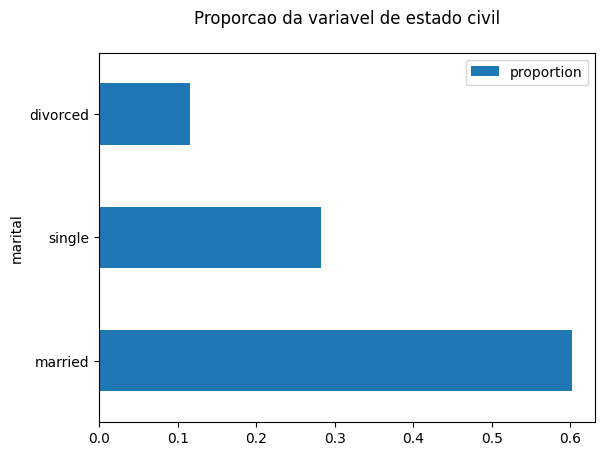

In [ ]:
# Plot, mesma informacao de cima porem em grafico
df.marital.value_counts(normalize= True).plot(kind= "barh")
plt.title("Proporcao da variavel de estado civil\n")
plt.legend()
plt.show()

In [77]:
# Proporcao da variavel de job
df.job.value_counts(normalize= True)

job
blue-collar      0.215290
management       0.209247
technician       0.168035
admin.           0.114340
services         0.091853
retired          0.050087
self-employed    0.034860
entrepreneur     0.032890
unemployed       0.028840
housemaid        0.027423
student          0.020761
unknown          0.006374
Name: proportion, dtype: float64

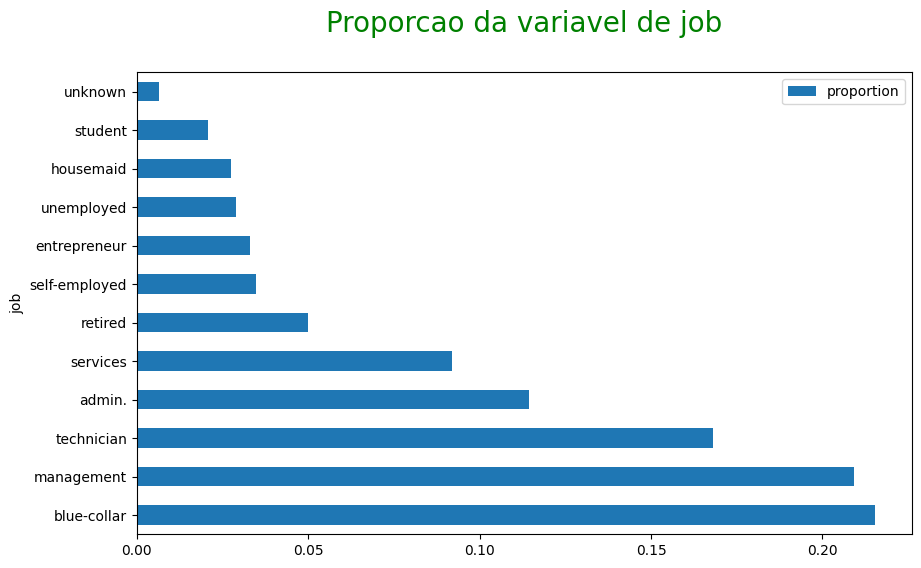

In [ ]:
# Plot, mesma informacao de cima porem em grafico
plt.figure(figsize= (10,6))
df.job.value_counts(normalize= True).plot(kind= "barh")
plt.title("Proporcao da variavel de job\n", fontdict= {'fontsize': 20, 'fontweight': 5, 'color': 'Green'})
plt.legend()
plt.show()


In [79]:
# Proporcao da variavel de education
df.education.value_counts(normalize= True)

education
secondary    0.513247
tertiary     0.294194
primary      0.151480
unknown      0.041079
Name: proportion, dtype: float64

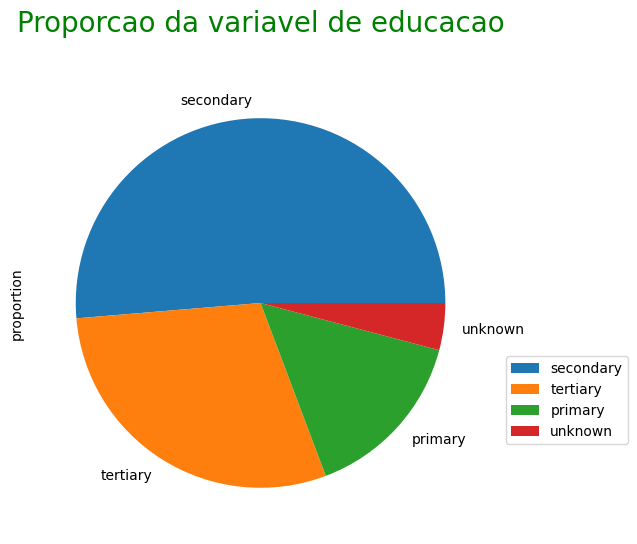

In [80]:
# Plot, mesma informacao de cima porem em grafico
plt.figure(figsize= (10,6))
df.education.value_counts(normalize= True).plot(kind= "pie")
plt.title("Proporcao da variavel de educacao\n", fontdict= {'fontsize': 20, 'fontweight': 5, 'color': 'Green'})
plt.legend()
plt.legend(bbox_to_anchor=(1.31,0.4))
plt.show()

In [81]:
# Proporcao da variavel response
df.response.value_counts(normalize= True)

response
no     0.882982
yes    0.117018
Name: proportion, dtype: float64

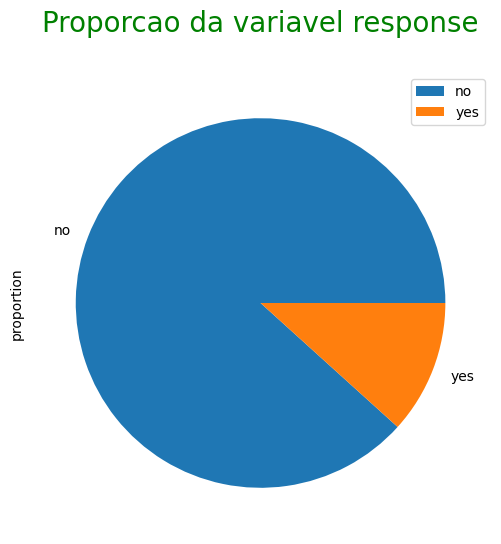

In [82]:
# Plot, mesma informacao de cima porem em grafico
plt.figure(figsize= (10,6))
df.response.value_counts(normalize= True).plot(kind = "pie")
plt.title("Proporcao da variavel response\n", fontdict= {'fontsize': 20, 'fontweight': 5, 'color': 'Green'})
plt.legend()
plt.show()


## Analise Multivariada


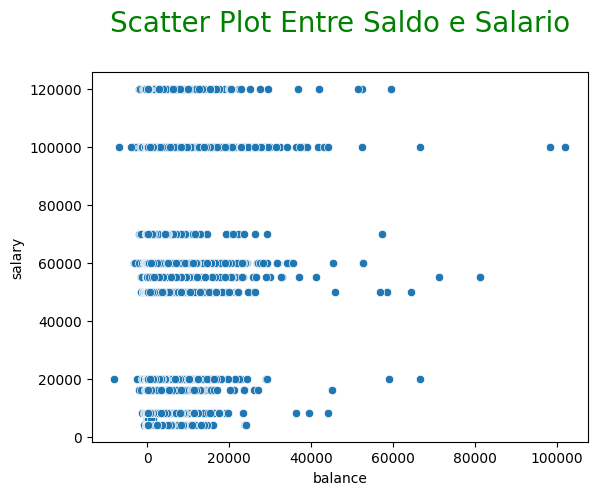

In [84]:
# Scatter Plot
sns.scatterplot(x=df["balance"], y=df["salary"])
plt.title("Scatter Plot Entre Saldo e Salario\n", fontdict= {'fontsize': 20, 'fontweight': 5, 'color': 'Green'})
plt.show()

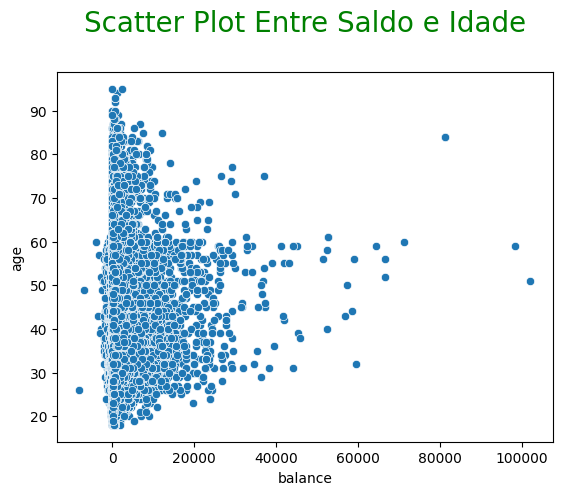

In [85]:
# Scatter Plot
sns.scatterplot(x=df["balance"], y=df["age"])
plt.title("Scatter Plot Entre Saldo e Idade\n", fontdict= {'fontsize': 20, 'fontweight': 5, 'color': 'Green'})
plt.show()

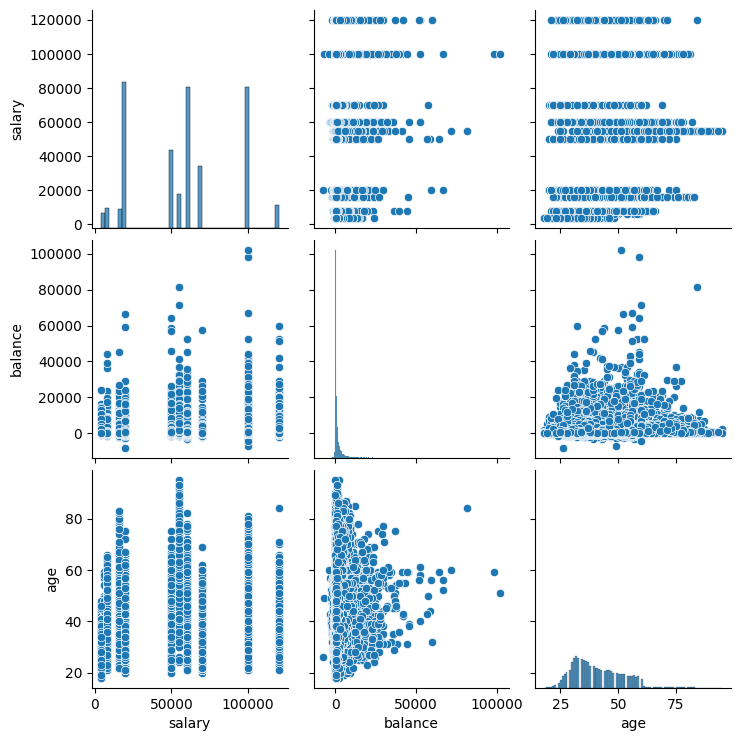

In [ ]:
# Pair Plot, para visualizar tudo de uma vez so (nao muito util)
sns.pairplot(df[["salary", "balance", "age"]])
plt.show()

In [ ]:
# Calcula a correlacao, apenas entre variaveis numericas
res = df[["salary", "balance", "age"]].corr()

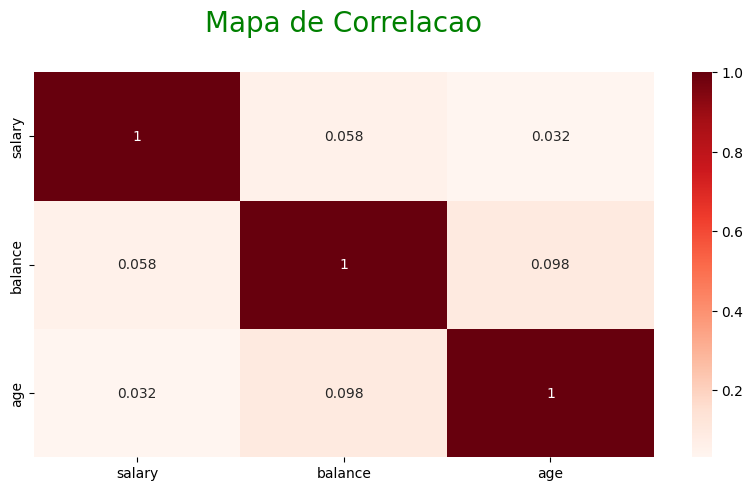

In [88]:
# Mapa da correlacao
plt.figure(figsize= (10,5))
sns.heatmap(res, annot= True, cmap= "Reds")
plt.title("Mapa de Correlacao\n", fontdict= {'fontsize': 20, 'fontweight': 5, 'color': 'Green'})
plt.show()

### Numerico x Categorico



In [89]:
# Agrupa o salario pela variavel resposta e calcula a media
df.groupby(by = ["response"])["salary"].mean()

response
no     57122.499624
yes    59157.556270
Name: salary, dtype: float64

In [90]:
# Agrupa o salario pela variavel resposta e calcula a mediana
df.groupby(by = ["response"])["salary"].median()

response
no     60000.0
yes    60000.0
Name: salary, dtype: float64

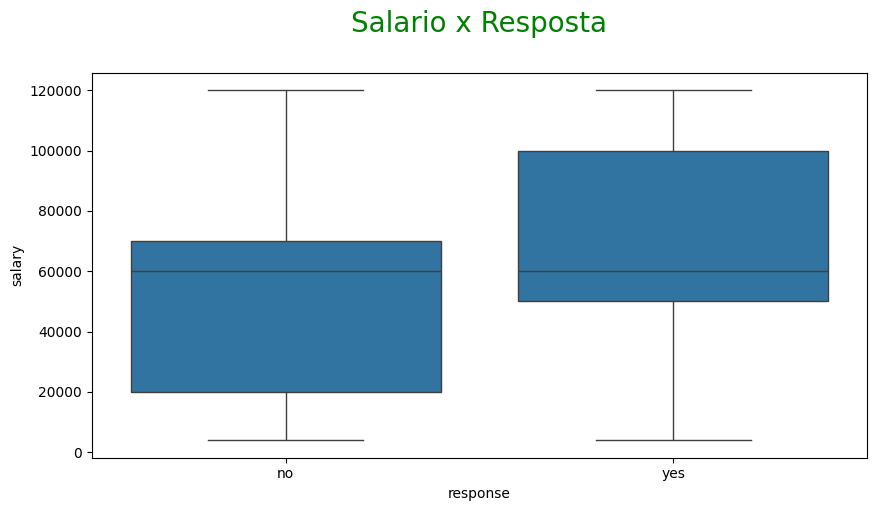

In [91]:
# Boxplot
plt.figure(figsize= (10,5))
sns.boxplot(x=df["response"], y=df["salary"])
plt.title("Salario x Resposta\n", fontdict= {'fontsize': 20, 'fontweight': 5, 'color': 'Green'})
plt.show()

In [92]:
# Agrupa educacao por salario e calcula a media
df.groupby(by = ["education"])["salary"].mean()

education
primary      34657.656341
secondary    49899.133210
tertiary     83008.576587
unknown      50621.228448
Name: salary, dtype: float64

In [100]:
# Cria a variavel response_flag como tipo numerico onde response "yes" = 1, "no" = 0
df["response_flag"] = np.where(df["response"] == "yes", 1,0)
df.head()

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,previous,poutcome,response,job,education,response_flag
0,58,100000.0,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,0,unknown,no,management,tertiary,0
1,44,60000.0,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,0,unknown,no,technician,secondary,0
2,33,120000.0,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,0,unknown,no,entrepreneur,secondary,0
3,47,20000.0,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,0,unknown,no,blue-collar,unknown,0
4,33,60000.0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,0,unknown,no,unknown,unknown,0


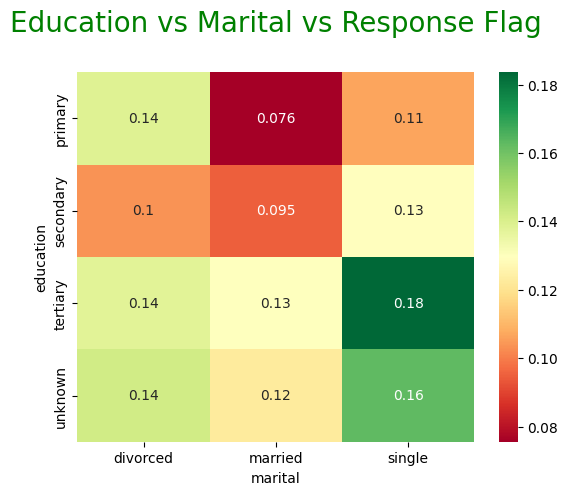

In [96]:
# Mapa de correlacao
res1 = df.pivot_table(index= "education", columns= "marital", values= "response_flag", aggfunc= "mean")
sns.heatmap(res1, annot= True, cmap= "RdYlGn")
plt.title("Education vs Marital vs Response Flag\n", fontdict= {'fontsize': 20, 'fontweight': 5, 'color': 'Green'})
plt.show()

### RELATORIO AQUI

# Fim